In [1]:
#NEW DOCUMNET USE THIS NOT THE OTHER ONE 

In [2]:
#importing stuff
from astropy.table import Table, join, unique, QTable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter
%matplotlib inline 

import h5py

In [3]:
#reading files using Table.read function in astropy.table
data_summary_6811 = Table.read("/users/EllaMathews/Research/summary_ngc6811.csv")
data_xmatch_6811 = Table.read("/users/EllaMathews/Research/summary_ngc6811_xmatch_gaiadr3.csv")

In [4]:
data_xmatch_6811.info
#data_summary_6811.info

<Table length=11581>
     name      dtype     class     n_bad
------------- ------- ------------ -----
      angDist float64       Column     0
           id   int64       Column     0
       ra(hr) float64       Column     0
      ra(deg) float64       Column     0
     dec(deg) float64       Column     0
      DR3Name   str28       Column     0
        RAdeg float64       Column     0
        DEdeg float64       Column     0
   errHalfMaj float64       Column     0
   errHalfMin float64       Column     0
    errPosAng   int64       Column     0
        SolID   int64       Column     0
       Source   int64       Column     0
      RandomI   int64       Column     0
      e_RAdeg float64       Column     0
      e_DEdeg float64       Column     0
          Plx float64 MaskedColumn   440
        e_Plx float64 MaskedColumn   440
         RPlx float64 MaskedColumn   440
           PM float64 MaskedColumn   440
         pmRA float64 MaskedColumn   440
       e_pmRA float64 MaskedColumn  

In [5]:
#isolating the columns that is needed in the output table 
data_xmatch_6811.sort(keys = 'angDist')
data_gaia_6811_columnsneeded = unique(data_xmatch_6811['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'],keys='id')
data_gaia_6811_columnsneeded.sort(keys = ['id', 'angDist'])
data_gaia_6811_columnsneeded2 = unique(data_gaia_6811_columnsneeded['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'],keys='DR3Name')

In [6]:
#using join function to crossmatch the two tables
combined_table = join(data_summary_6811, data_gaia_6811_columnsneeded2, keys='id', join_type ='right')
combined_table_wantedcolumns= combined_table['angDist', 'date', 'fwhm', 'id', 'hjd', 'ra', 'dec','v', 'bv', 'teff', 'feh', 'feh_err', 'logg', 'logg_err', 'rv', 'rve','vsini', 'vsini_err','RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name']

In [7]:
#combined_table.info

In [8]:
combined_table_wantedcolumns.write('Combined_Data_6811.csv', format ='csv', overwrite = True)

In [9]:
#using unique function to get the first instance of each id 
unique_ids = unique(data_xmatch_6811, keys = 'id') #do this for just xmatch data add v and bv from summary table 
unique_ids.sort(keys = ['id', 'angDist'])
unique_ids2 = unique(unique_ids, keys = 'DR3Name')

In [10]:
unique_kic_id = unique(data_summary_6811['id', 'v', 'bv'], keys = 'id')

In [11]:
unique_ids_combined = join(unique_ids2, unique_kic_id)

In [12]:
#using numpy unique function to get the values of the unique ids and how many times they appear 
values, counts = np.unique(unique_ids_combined['id'], return_counts=True)

In [13]:
#seeing where the unique values appear more than once 
duplicates = counts > 1

In [14]:
#using the location of the duplicated unique values to find which ids are duplicated 
duplicated_ids=values[np.where(duplicates)]

In [15]:
len(unique_ids_combined)

3422

In [16]:
len(duplicated_ids)

0

In [17]:
unique_ids_combined.write('Combined_Data_Unique_6811.csv', format = 'csv', overwrite = True)

In [18]:
#function that plots V vs B-V as long as the input has columns labled bv and v
def VvsBV(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['bv'], tbl['v'], '.', alpha = 0.25)
    ax.set_xlabel('B-V')
    ax.set_ylabel('V')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.05)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis()
    plt.show();
    

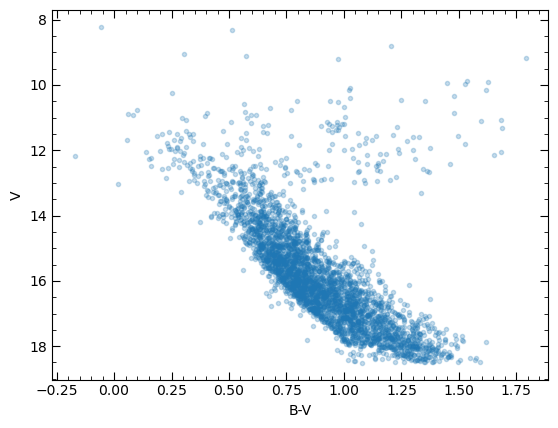

In [19]:
#trying out the function with the 6811 data from above
VvsBV(unique_ids_combined)

In [20]:
#function that plots G vs BP-RP
def GvsBPRP(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['BP-RP'], tbl['Gmag'], '.', alpha = 0.25)
    ax.set_xlabel('BP-RP')
    ax.set_ylabel('Gmag')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.25)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis() #flip y axis
    plt.show();

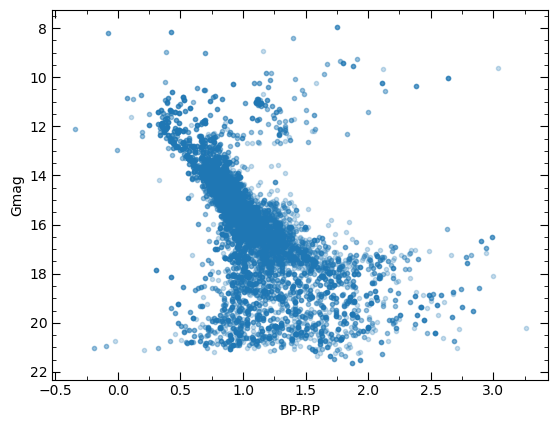

In [21]:
GvsBPRP(data_xmatch_6811)

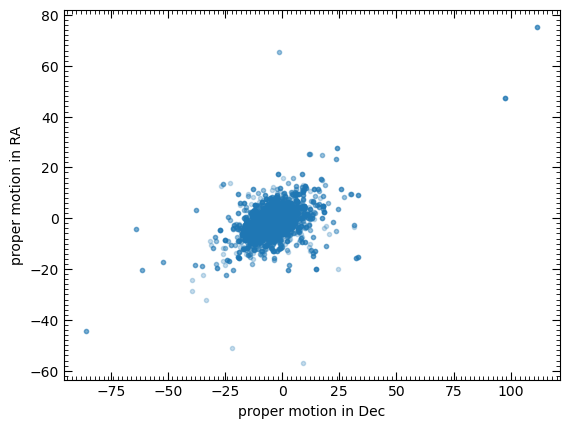

In [22]:
#plot proper motion in Ra vs proper motion in Dec 
fig, ax = plt.subplots()
ax.plot(data_xmatch_6811['pmDE'], data_xmatch_6811['pmRA'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('proper motion in RA')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(2)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

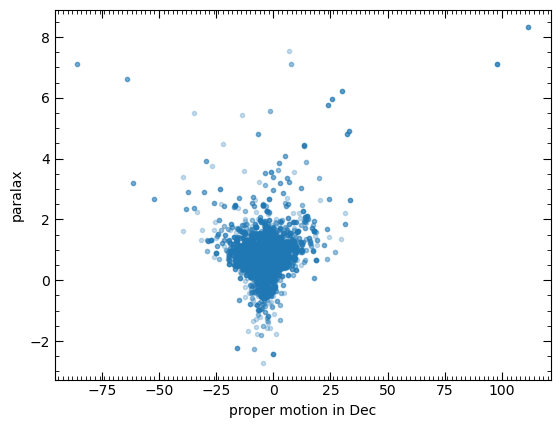

In [23]:
#plot paralax vs proper motion in Dec
fig, ax = plt.subplots()
ax.plot(data_xmatch_6811['pmDE'], data_xmatch_6811['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

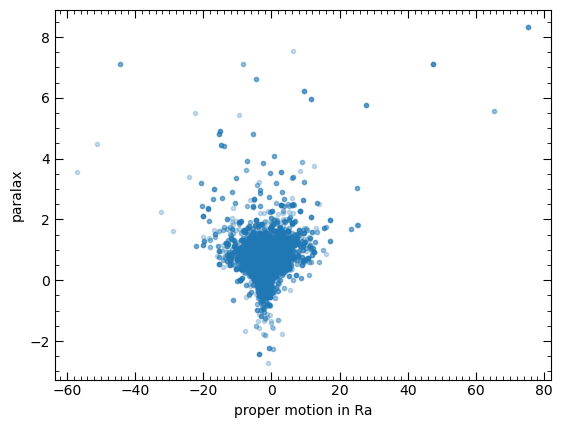

In [24]:
#plot paralax vs proper motion in RA
fig, ax = plt.subplots()
ax.plot(data_xmatch_6811['pmRA'], data_xmatch_6811['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Ra')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

In [25]:
#importing new data
data = h5py.File('/users/EllaMathews/Research/ngc6811_UTP_v1_new.h5', 'r')
data['catalog'].dtype

dtype([('H3_ID', '<f8'), ('PS_ID', '<i8'), ('TMASS_ID', '<i8'), ('WISE_ID', 'S28'), ('UNWISE_ID', 'S16'), ('SDSS_ID', '<i8'), ('GALEX_ID', '<i8'), ('DES_ID', '<i8'), ('DECAPS_ID', '<i8'), ('UKIDSS_ID', '<i8'), ('APOPAYNE_ID', '<i8'), ('LAMOST_ID', '<i4'), ('GAIADR1_ID', '<f8'), ('GAIADR2_ID', '<f8'), ('GAIAEDR3_ID', '<i8'), ('TILE_ID', '<f8'), ('RA', '<f8'), ('DEC', '<f8'), ('RA_S', '<f8'), ('DEC_S', '<f8'), ('L', '<f8'), ('B', '<f8'), ('EBV', '<f4'), ('BHB', '<f8'), ('MGIANT', '<f8'), ('RAND', '<f8'), ('GUIDE', '<f8'), ('XFIT_RANK', '<f8'), ('PS_G', '<f4'), ('PS_R', '<f4'), ('PS_I', '<f4'), ('PS_Z', '<f4'), ('PS_Y', '<f4'), ('SDSS_U', '<f4'), ('SDSS_G', '<f4'), ('SDSS_R', '<f4'), ('SDSS_I', '<f4'), ('SDSS_Z', '<f4'), ('TMASS_J', '<f4'), ('TMASS_H', '<f4'), ('TMASS_K', '<f4'), ('WISE_W1', '<f4'), ('WISE_W2', '<f4'), ('WISE_W3', '<f4'), ('WISE_W4', '<f4'), ('UNWISE_W1', '<f4'), ('UNWISE_W2', '<f4'), ('GALEX_NUV', '<f4'), ('GALEX_FUV', '<f4'), ('DES_G', '<f4'), ('DES_R', '<f4'), ('DES_I'

In [26]:
membool = data['catalog']['MemBool'] #if 0 not in cluster if 1 in cluster

In [27]:
inCluster = data['catalog']['GAIAEDR3_ID'][membool == 1]

In [28]:
len(inCluster)

260

In [29]:
unimodal_data = Table.read('/users/EllaMathews/Summer-Research/data_for_unimodal_plots_200M.csv')

In [30]:
dataTable = Table()
dataTable['id'] = data['catalog']['GAIAEDR3_ID']
dataTable['BP'] = data['catalog']['GAIAEDR3_BP']
dataTable['RP'] = data['catalog']['GAIAEDR3_RP']
dataTable['G'] = data['catalog']['GAIAEDR3_G']
dataTable['MemBool'] = data['catalog']['MemBool']
dataTable['Paralax'] = data['catalog']['GAIAEDR3_PARALLAX_CORRECTED']/1000
dataTable['d'] = 1/dataTable['Paralax']

In [76]:
absmags =[]

for i in range(len(dataTable['d'])):
    if dataTable['d'][i] > 0:
        l = np.log10(dataTable['d'][i]/10)
        absmag = dataTable['G'][i] - (5*l)
        absmags.append(absmag)
    else:
        absmags.append(0)
dataTable['absmag'] = absmags

In [77]:
uni_member = join(unimodal_data, dataTable , keys = ['id'])

In [78]:
bprp = dataTable['BP'] - dataTable['RP']
x = bprp
y = dataTable['absmag']

In [79]:
bprp_uni = uni_member['BP'] - uni_member['RP']
x_uni = bprp_uni
y_uni = uni_member['absmag']
P_log = np.log(uni_member['P_median'])

Text(0.5, 1.0, 'CMD for NGC6811: Color by log(Period)')

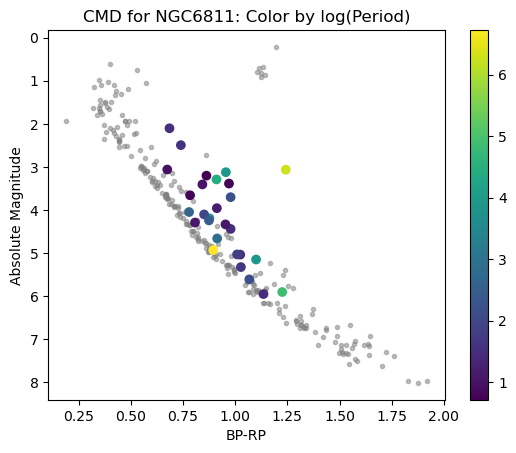

In [80]:
fig, ax = plt.subplots()
plt.scatter(x[membool==1], y[membool==1], c='gray', alpha = .5, marker ='.') #members of cluster
scatter = plt.scatter(x_uni, y_uni, c = P_log)
plt.colorbar(scatter)
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('CMD for NGC6811: Color by log(Period)')

Text(0.5, 1.0, 'CMD for NGC6811: Color by e')

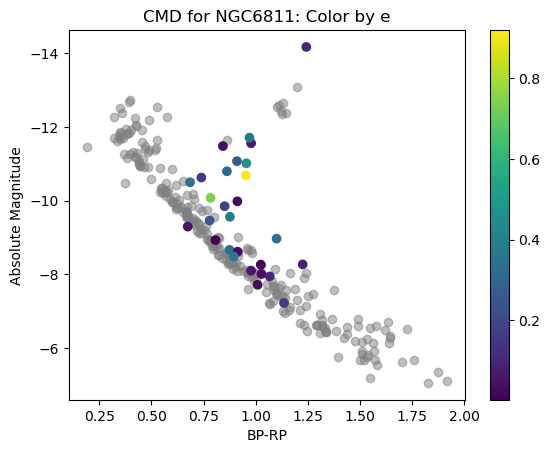

In [36]:
fig, ax = plt.subplots()
plt.scatter(x[membool==1], y[membool==1], c='gray', alpha = .5) #members of cluster
scatter = plt.scatter(x_uni, y_uni, c = uni_member['e_median'])
plt.colorbar(scatter)
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('CMD for NGC6811: Color by e')

Text(0, 0.5, 'G')

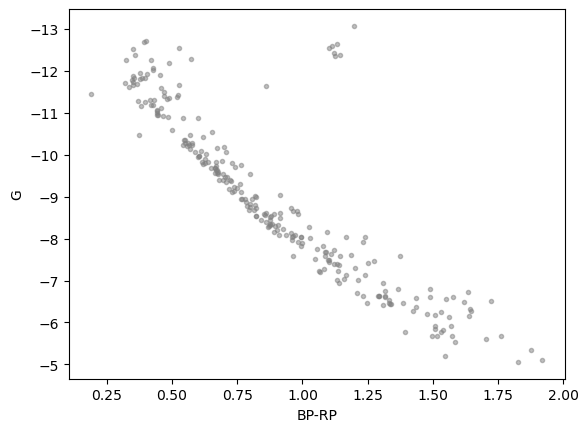

In [37]:
fig, ax = plt.subplots()
ax.scatter(x[membool == 1], y[membool == 1], alpha = .5, marker ='.', color = 'gray')
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

In [38]:
#add another plot over this one with the data that we have rvs for 

In [39]:
dr3names = combined_table_wantedcolumns['DR3Name']
dr3nums = []
for name in dr3names:
    num = np.int64(name[9:])
    dr3nums.append(num)

In [40]:
values2 = np.unique(combined_table_wantedcolumns['DR3Name'])

In [41]:
values3 = []
for name in values2:
    num = np.int64(name[9:])
    values3.append(num)

In [42]:
checkvalues = []
checkvalues2 = []
counts3 = []
for num in inCluster:
    if num in values3:
        checkvalues.append(True)
        checkvalues2.append(False)
        count = dr3nums.count(num)
        counts3.append(count)
    else:
        checkvalues.append(False)
        checkvalues2.append(True)


In [43]:
xcluster = x[membool == 1]
ycluster = y[membool == 1]

Text(0, 0.5, 'G')

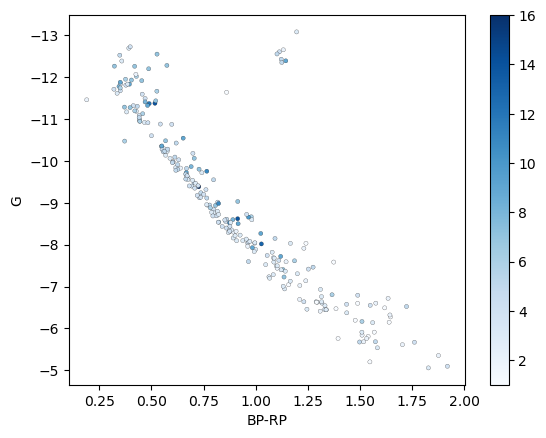

In [44]:
fig, ax = plt.subplots()
#plt.scatter(xcluster, ycluster, alpha = .5, marker ='.', color = 'gray')
scatter = plt.scatter(xcluster[checkvalues], ycluster[checkvalues], marker = '.', c=counts3, cmap = 'Blues', edgecolors = 'black', linewidths = 0.15)
#add legend of what colors mean
plt.colorbar(scatter)
#legend1 = ax.legend(*scatter.legend_elements(num=16),
                   # loc=0, title="# of Points")
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

In [45]:
print(counts3)

[5, 1, 12, 4, 5, 1, 5, 8, 5, 3, 7, 6, 4, 7, 4, 5, 3, 2, 5, 2, 1, 2, 3, 3, 6, 6, 7, 3, 3, 6, 7, 5, 4, 3, 3, 2, 14, 3, 8, 5, 4, 9, 5, 4, 5, 5, 4, 2, 10, 4, 14, 5, 11, 3, 3, 9, 3, 3, 3, 4, 3, 4, 3, 2, 3, 3, 2, 3, 2, 6, 2, 1, 1, 3, 9, 9, 4, 7, 6, 7, 3, 5, 3, 4, 4, 4, 2, 9, 4, 3, 2, 3, 4, 3, 2, 5, 4, 4, 5, 7, 3, 4, 5, 16, 5, 4, 6, 4, 4, 3, 2, 3, 4, 5, 5, 3, 4, 3, 4, 6, 5, 4, 1, 1, 3, 3, 4, 3, 3, 3, 1, 2, 3, 1, 7, 2, 3, 4, 6, 3, 3, 1, 2, 4, 4, 7, 4, 4, 4, 7, 4, 9, 4, 6, 4, 3, 9, 6, 9, 2, 3, 2, 4, 3, 5, 2, 5, 7, 9, 4, 5, 5, 5, 3, 4, 5, 7, 4, 4, 4, 4, 3, 3, 3, 7, 6, 3, 3, 5, 3, 3, 4, 3, 3, 7, 5, 3, 4, 4, 13, 3, 4, 8, 3, 5, 6, 6, 4, 3, 5, 9, 3, 3, 5, 4, 7, 7, 3, 5, 2, 3, 3, 1, 4, 3, 4, 9, 3, 3, 3, 3, 1, 3, 11, 8, 3, 1, 4, 4, 1, 5, 3, 11, 3, 3, 2, 1, 7, 3, 5, 4, 2, 2, 4]


In [46]:
combined_table_wantedcolumns.info

<Table length=8155>
   name    dtype 
--------- -------
  angDist float64
     date   int64
     fwhm float64
       id   int64
      hjd float64
       ra float64
      dec float64
        v float64
       bv float64
     teff   int64
      feh float64
  feh_err float64
     logg float64
 logg_err float64
       rv float64
      rve float64
    vsini float64
vsini_err float64
    RAdeg float64
  e_RAdeg float64
    DEdeg float64
  e_DEdeg float64
  DR3Name   str28

Text(0, 0.5, 'G')

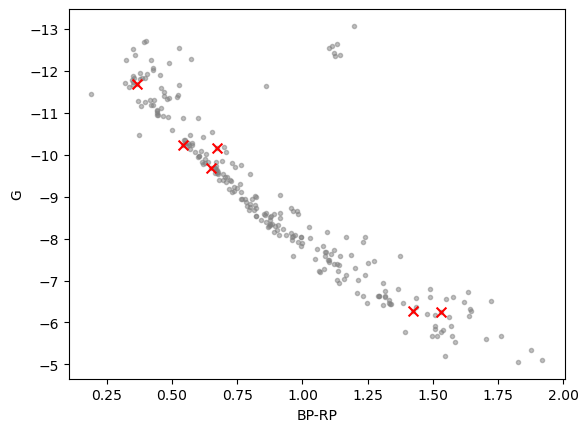

In [47]:
fig, ax = plt.subplots()
#ax.scatter(x, y, marker ='.', color = 'gray') #all in the catalog 
plt.scatter(xcluster, ycluster, marker = '.', c = 'grey', alpha = 0.5) #in the catalog and in the cluster
plt.scatter(xcluster[checkvalues2], ycluster[checkvalues2], marker = 'x', c = 'red', s=50) #in the catalog and in the cluster and do not have data for 

ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

In [48]:
#importing new data for new vs old comparison 

In [49]:
#importing new data
new_6811 = QTable.read("/users/EllaMathews/Research/rcat_ngc6811_v0.fits")
membership = new_6811['MemBool']

In [50]:
new_names_all = new_6811['GAIAEDR3_ID']
new_names_incluster = new_names_all[membership==1]

In [51]:
new_Teff_all = new_6811['Teff']
new_Teff_incluster = new_Teff_all[membership ==1]
new_Teff_err_all = new_6811['Teff_err']
new_Teff_err_incluster = new_Teff_err_all[membership==1]

In [52]:
new_logg_all = new_6811['log(g)']
new_logg_incluster = new_logg_all[membership ==1]
new_logg_err_all = new_6811['log(g)_err']
new_logg_err_incluster = new_logg_err_all[membership ==1]

In [53]:
new_feh_all = new_6811['[Fe/H]']
new_feh_err_all = new_6811['[Fe/H]_err']
new_feh_incluster = new_feh_all[membership==1]
new_feh_err_incluster = new_feh_err_all[membership==1]

In [54]:
new_rv_all = new_6811['vrad']
new_rv_err_all = new_6811['vrad_err']
new_rv_incluster = new_rv_all[membership==1]
new_rv_err_incluster = new_rv_err_all[membership==1]

In [55]:
new_obs_date_all = new_6811['DATE-OBS']
new_obs_date_incluster = new_obs_date_all[membership==1]

In [56]:
new_specjitter_all = new_6811['specjitter']
new_specjitter_incluster = new_specjitter_all[membership==1]

In [57]:
new_lsf_all = new_6811['lsf']
new_lsf_incluster = new_lsf_all[membership==1]

In [58]:
new_SNR_all = new_6811['SNR']
new_SNR_incluster = new_SNR_all[membership==1]

In [59]:
new_catalog = Table()

In [60]:
new_catalog['DR3_ID']= new_names_incluster
new_catalog['Teff_new'] = new_Teff_incluster
new_catalog['Teff_err_new'] = new_Teff_err_incluster
new_catalog['logg_new'] = new_logg_incluster
new_catalog['logg_err_new'] = new_logg_err_incluster
new_catalog['[Fe/H]_new'] = new_feh_incluster
new_catalog['[Fe/H]_err_new'] = new_feh_err_incluster
new_catalog['RV_new'] = new_rv_incluster
new_catalog['RV_err_new'] = new_rv_err_incluster
new_catalog['specjitter'] = new_specjitter_incluster
new_catalog['lsf'] = new_lsf_incluster
new_catalog['SNR'] = new_SNR_incluster

In [61]:
old_data = Table()
old_names =[]

In [62]:
for name in combined_table_wantedcolumns['DR3Name']:
    num = np.int64(name[9:])
    old_names.append(num)

In [63]:
old_data['DR3_ID'] = old_names
old_data['Teff_old'] = combined_table_wantedcolumns['teff']

In [64]:
old_data['logg_old'] = combined_table_wantedcolumns['logg']
old_data['logg_err_old'] = combined_table_wantedcolumns['logg_err']

In [65]:
old_data['[Fe/H]_old'] = combined_table_wantedcolumns['feh']
old_data['[Fe/H]_err_old'] = combined_table_wantedcolumns['feh_err']

In [66]:
old_data['RV_old'] = combined_table_wantedcolumns['rv']
old_data['RV_err_old'] = combined_table_wantedcolumns['rve']

In [67]:
old_data['fwhm'] = combined_table_wantedcolumns['fwhm']
old_data['DATE'] = combined_table_wantedcolumns['date']

In [68]:
newdatesreformat = []
for date in new_obs_date_incluster:
    newformat = date[0:4] + date[5:7] + date[8:10]
    newdatesreformat.append(np.int64(newformat))

In [69]:
new_catalog['DATE'] = newdatesreformat

In [70]:
NewVsOld = join(new_catalog, old_data, keys = ['DR3_ID', 'DATE'])

In [71]:
Teff_check = NewVsOld['Teff_new']

Text(0, 0.5, 'New Teff')

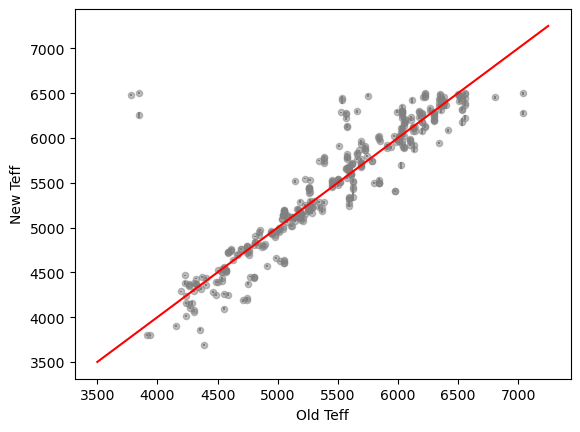

In [72]:
#new vs old Teff
fig, ax = plt.subplots()
x1 = np.linspace(3500, 7250)
ax.plot(x1, x1, 'r')
x = NewVsOld['Teff_old'][Teff_check < 6500]
y = NewVsOld['Teff_new'][Teff_check < 6500]
scatter = plt.scatter(x, y, alpha= 0.5, c = 'gray', s=20)
plt.errorbar(x, y, yerr = NewVsOld['Teff_err_new'][Teff_check < 6500], fmt = 'none', color = 'gray', zorder=-1)
#plt.colorbar(scatter)
ax.set_xlabel('Old Teff')
ax.set_ylabel('New Teff')


Text(0, 0.5, 'New logg')

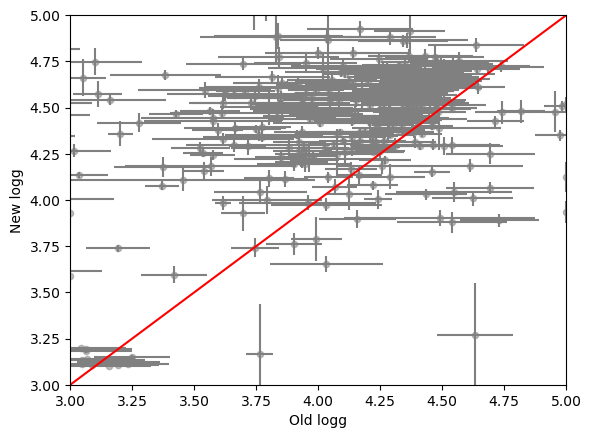

In [73]:
#new vs old logg
fig, ax = plt.subplots()
x1 = np.linspace(3, 5)
ax.plot(x1, x1,'r')
x = NewVsOld['logg_old'][Teff_check < 6500]
y = NewVsOld['logg_new'][Teff_check < 6500]
scatter = plt.scatter(x, y, c = 'gray', s = 20, alpha = 0.5)
plt.errorbar(x, y, yerr=NewVsOld['logg_err_new'][Teff_check < 6500], fmt="none", color='gray', zorder=-1)
plt.errorbar(x, y, xerr=NewVsOld['logg_err_old'][Teff_check < 6500], fmt="none", color='gray', zorder=-1)
#plt.colorbar(scatter)
ax.set_xlim(3,5)
ax.set_ylim(3,5)
ax.set_xlabel('Old logg')
ax.set_ylabel('New logg')

Text(0, 0.5, 'New Fe/H')

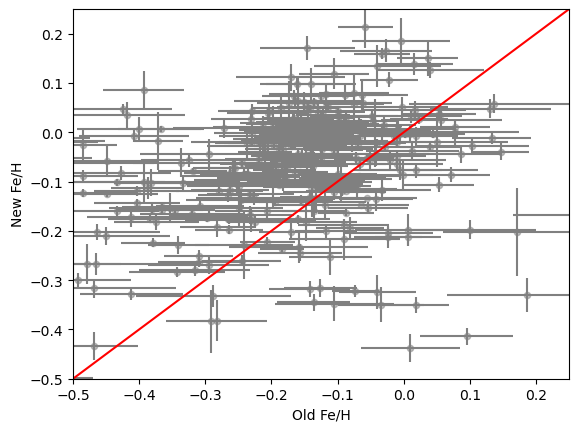

In [74]:
#new vs old Fe/H
fig, ax = plt.subplots()
x1 = np.linspace(-.5, .25)
ax.plot(x1, x1,'r')
x = NewVsOld['[Fe/H]_old'][Teff_check < 6500]
y = NewVsOld['[Fe/H]_new'][Teff_check < 6500]
scatter = plt.scatter(x, y, c = 'gray', alpha = 0.5, s = 20)
plt.errorbar(x, y, yerr=NewVsOld['[Fe/H]_err_new'][Teff_check < 6500], fmt="none", color='gray', zorder =-1)
plt.errorbar(x, y, xerr=NewVsOld['[Fe/H]_err_old'][Teff_check < 6500], fmt="none", color='gray', zorder =-1)
#plt.colorbar(scatter)
ax.set_xlim(-.5,.25)
ax.set_ylim(-.5,.25)
ax.set_xlabel('Old Fe/H')
ax.set_ylabel('New Fe/H')

Text(0, 0.5, 'New RV')

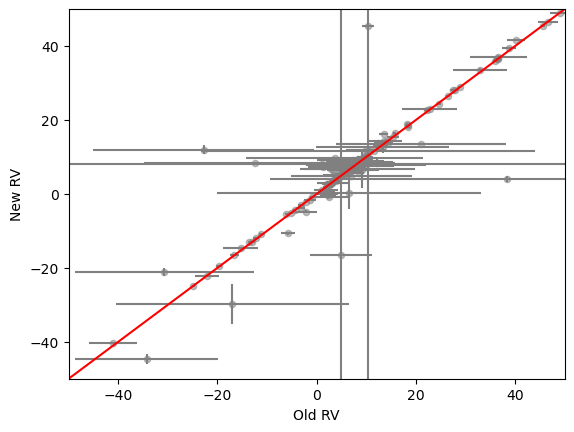

In [75]:
#new vs old RV
fig, ax = plt.subplots()
x1 = np.linspace(-500, 500)
ax.plot(x1, x1,'r')
x = NewVsOld['RV_old'][Teff_check < 6500]
y = NewVsOld['RV_new'][Teff_check < 6500]
scatter = plt.scatter(x, y, c = 'gray', s = 20, alpha = 0.5)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
plt.errorbar(x, y, yerr=NewVsOld['RV_err_new'][Teff_check < 6500], fmt="none", color='gray', zorder = -1)
plt.errorbar(x, y, xerr=NewVsOld['RV_err_old'][Teff_check < 6500], fmt="none", color='gray', zorder = -1)
#plt.colorbar(scatter)
ax.set_xlabel('Old RV')
ax.set_ylabel('New RV')